In [35]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.utils import resample

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

## First look at the data

In [2]:
df = pd.read_csv('../data/indian_liver_patient.csv')

df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1

In [3]:
df.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  583.000000       583.000000        583.000000            583.000000   
mean    44.746141         3.298799          1.486106            290.576329   
std     16.189833         6.209522          2.808498            242.937989   
min      4.000000         0.400000          0.100000             63.000000   
25%     33.000000         0.800000          0.200000            175.500000   
50%     45.000000         1.000000          0.300000            208.000000   
75%     58.000000         2.600000          1.300000            298.000000   
max     90.000000        75.000000         19.700000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                583.000000                  583.000000      583.000000   
mean                  80.713551                  109.910806        6.483190   
std                  182.620356                  288.918529        1.085451   
min                   10.000000                   10.000000        2.700000   
25%                   23.000000                   25.000000        5.800000   
50%                   35.000000                   42.000000        6.600000   
75%                   60.500000                   87.000000        7.200000   
max                 2000.000000                 4929.000000        9.600000   

          Albumin  Albumin_and_Globulin_Ratio     Dataset  
count  583.000000                  579.000000  583.000000  
mean     3.141852                    0.947064    1.286449  
std      0.795519                    0.319592    0.452490  
min      0.900000                    0.300000    1.000000  
25%      2.600000                    0.700000    1.000000  
50%      3.100000                    0.930000    1.000000  
75%      3.800000                    1.100000    2.000000  
max      5.500000                    2.800000    2.000000

The difference between 75% and max in some case is quite large. Indicating outliers

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Only gender is non-numeric. There are 10 features and 1 output

In [5]:
# check unique value of Target
df['Dataset'].unique()

array([1, 2], dtype=int64)

In [6]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Dataset']].groupby(['Dataset'])[[var]].median().reset_index()
    return temp

In [8]:
median_target('Albumin_and_Globulin_Ratio')

Dataset  Albumin_and_Globulin_Ratio
0        1                         0.9
1        2                         1.0

In [9]:
# replace missing value with relevant element
df.loc[(df['Albumin_and_Globulin_Ratio'] == 1 ) & (df['Albumin_and_Globulin_Ratio'].isnull()), 'Albumin_and_Globulin_Ratio'] = 0.9
df.loc[(df['Albumin_and_Globulin_Ratio'] == 2 ) & (df['Albumin_and_Globulin_Ratio'].isnull()), 'Albumin_and_Globulin_Ratio'] = 1

## Plotting Data

<AxesSubplot:xlabel='Dataset', ylabel='count'>

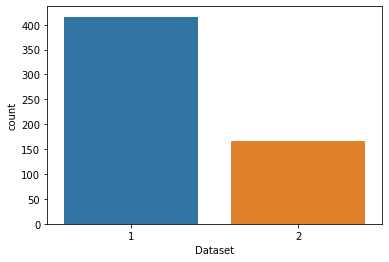

In [10]:
sns.countplot(data=df, x='Dataset', label='Count')

<AxesSubplot:xlabel='Gender', ylabel='count'>

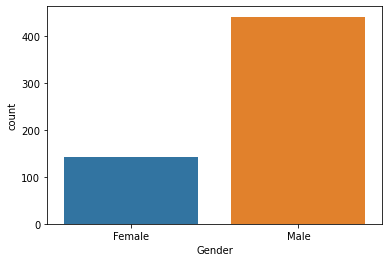

In [11]:
sns.countplot(data=df, x='Gender', label='Count')

<AxesSubplot:xlabel='Age', ylabel='Count'>

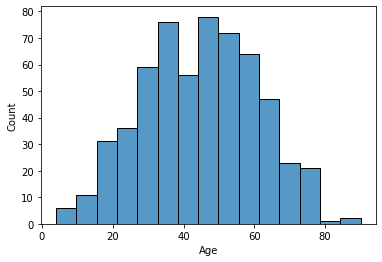

In [12]:
# check age group
sns.histplot(df, x='Age')

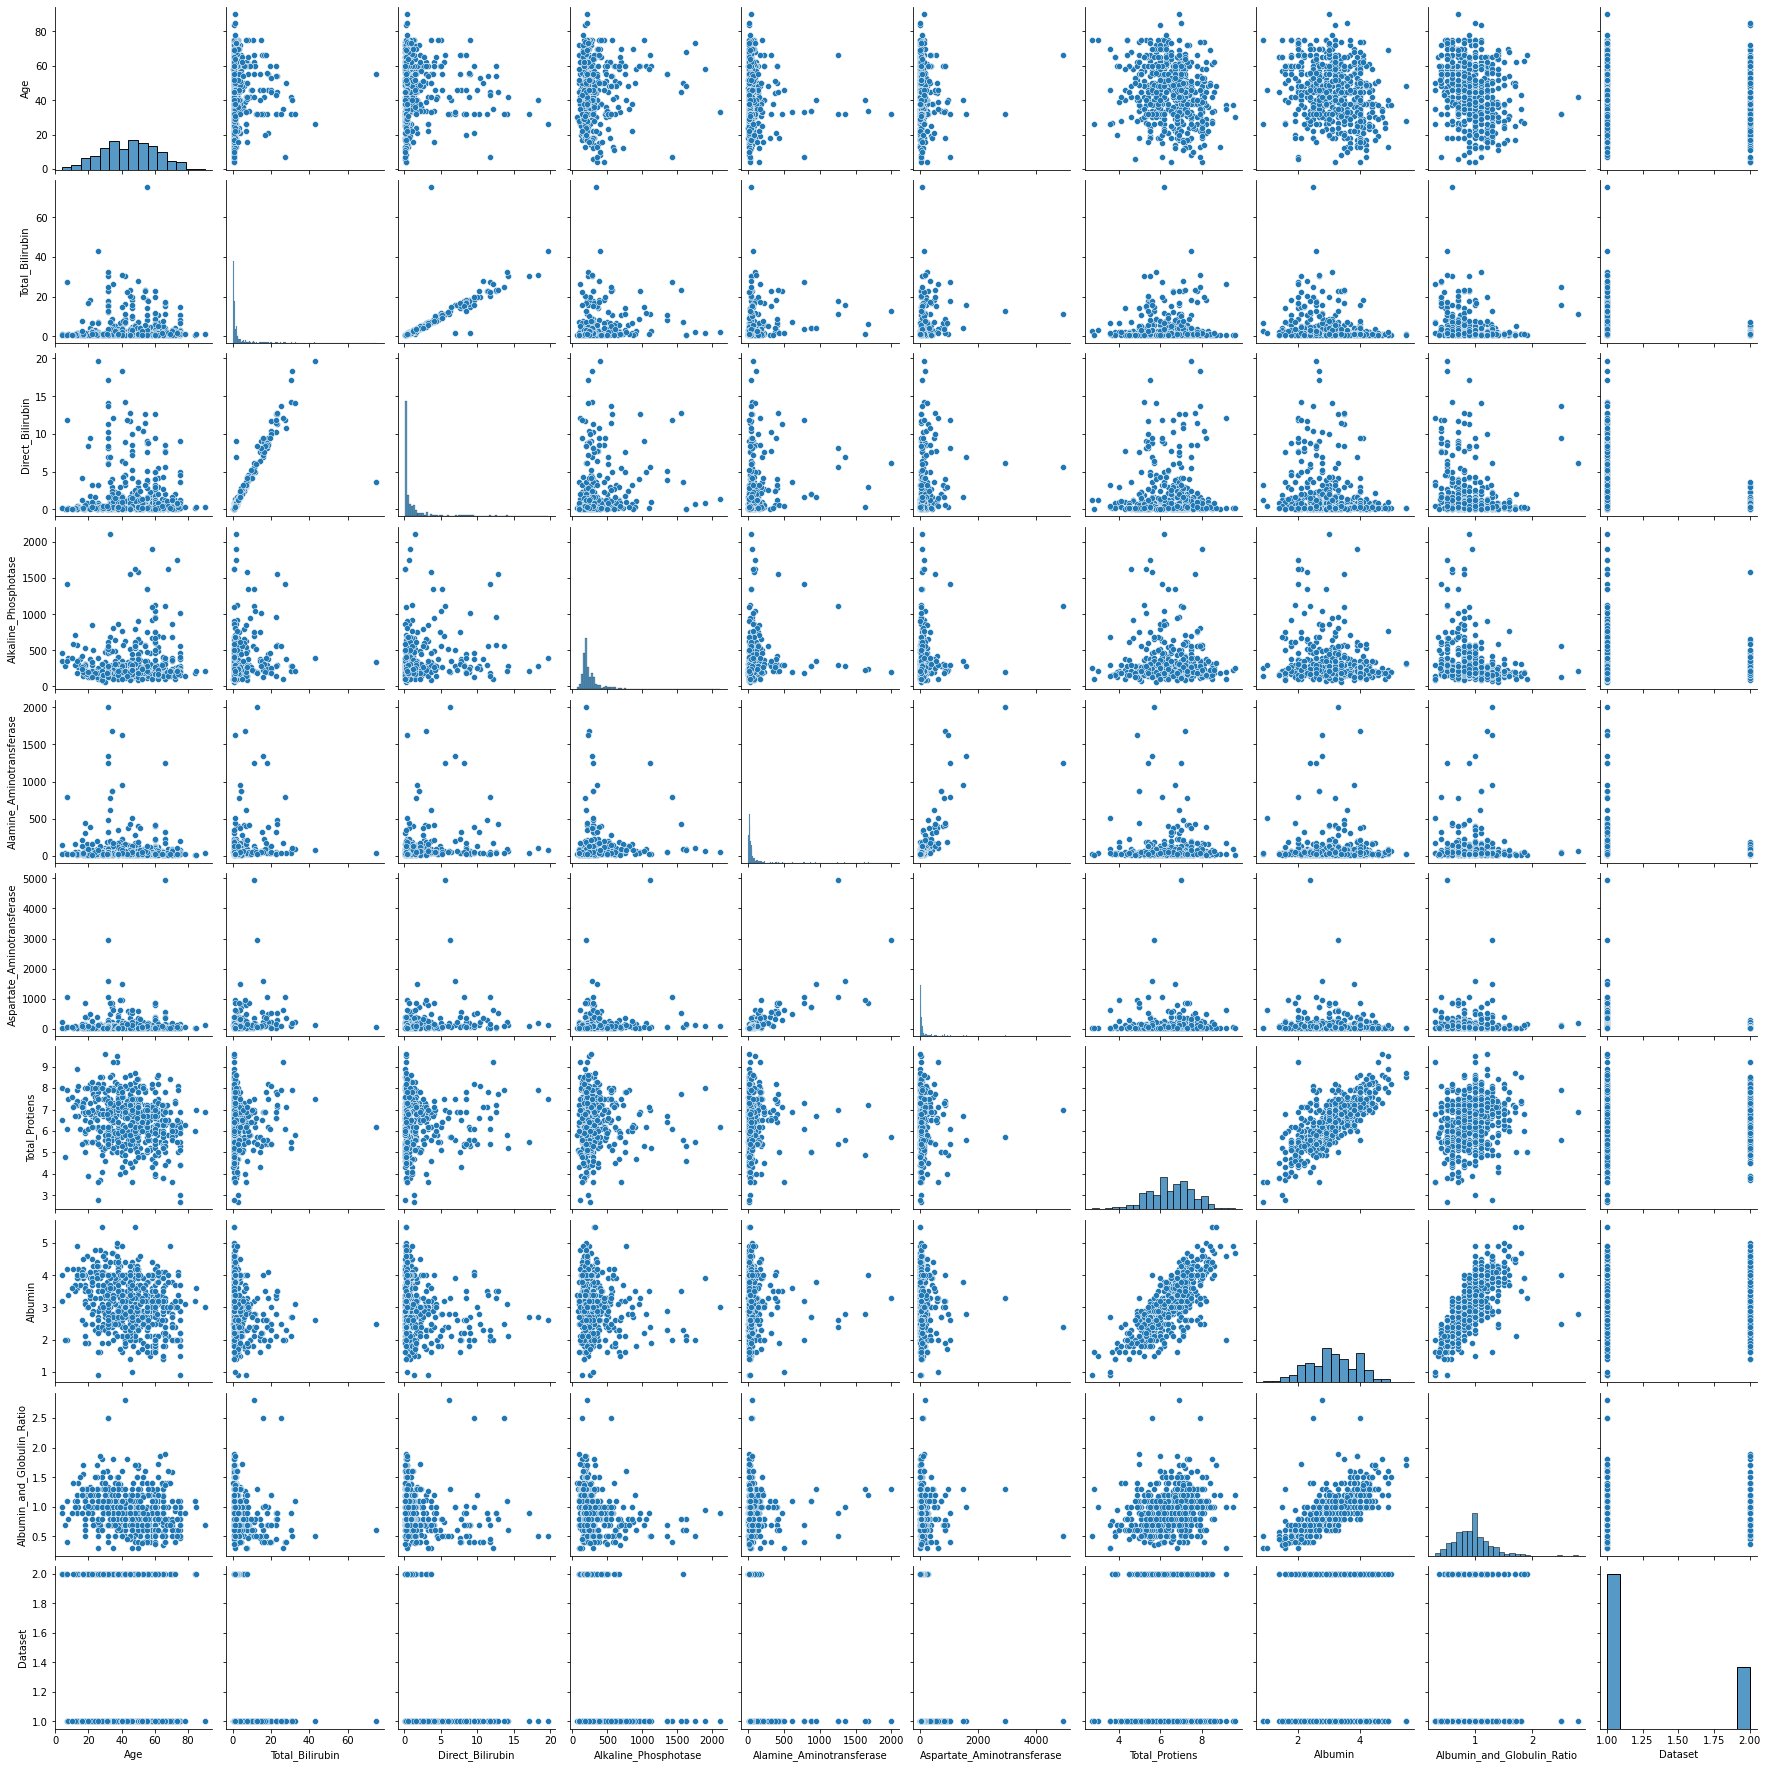

In [13]:
# look at pairplot
sns.pairplot(df)

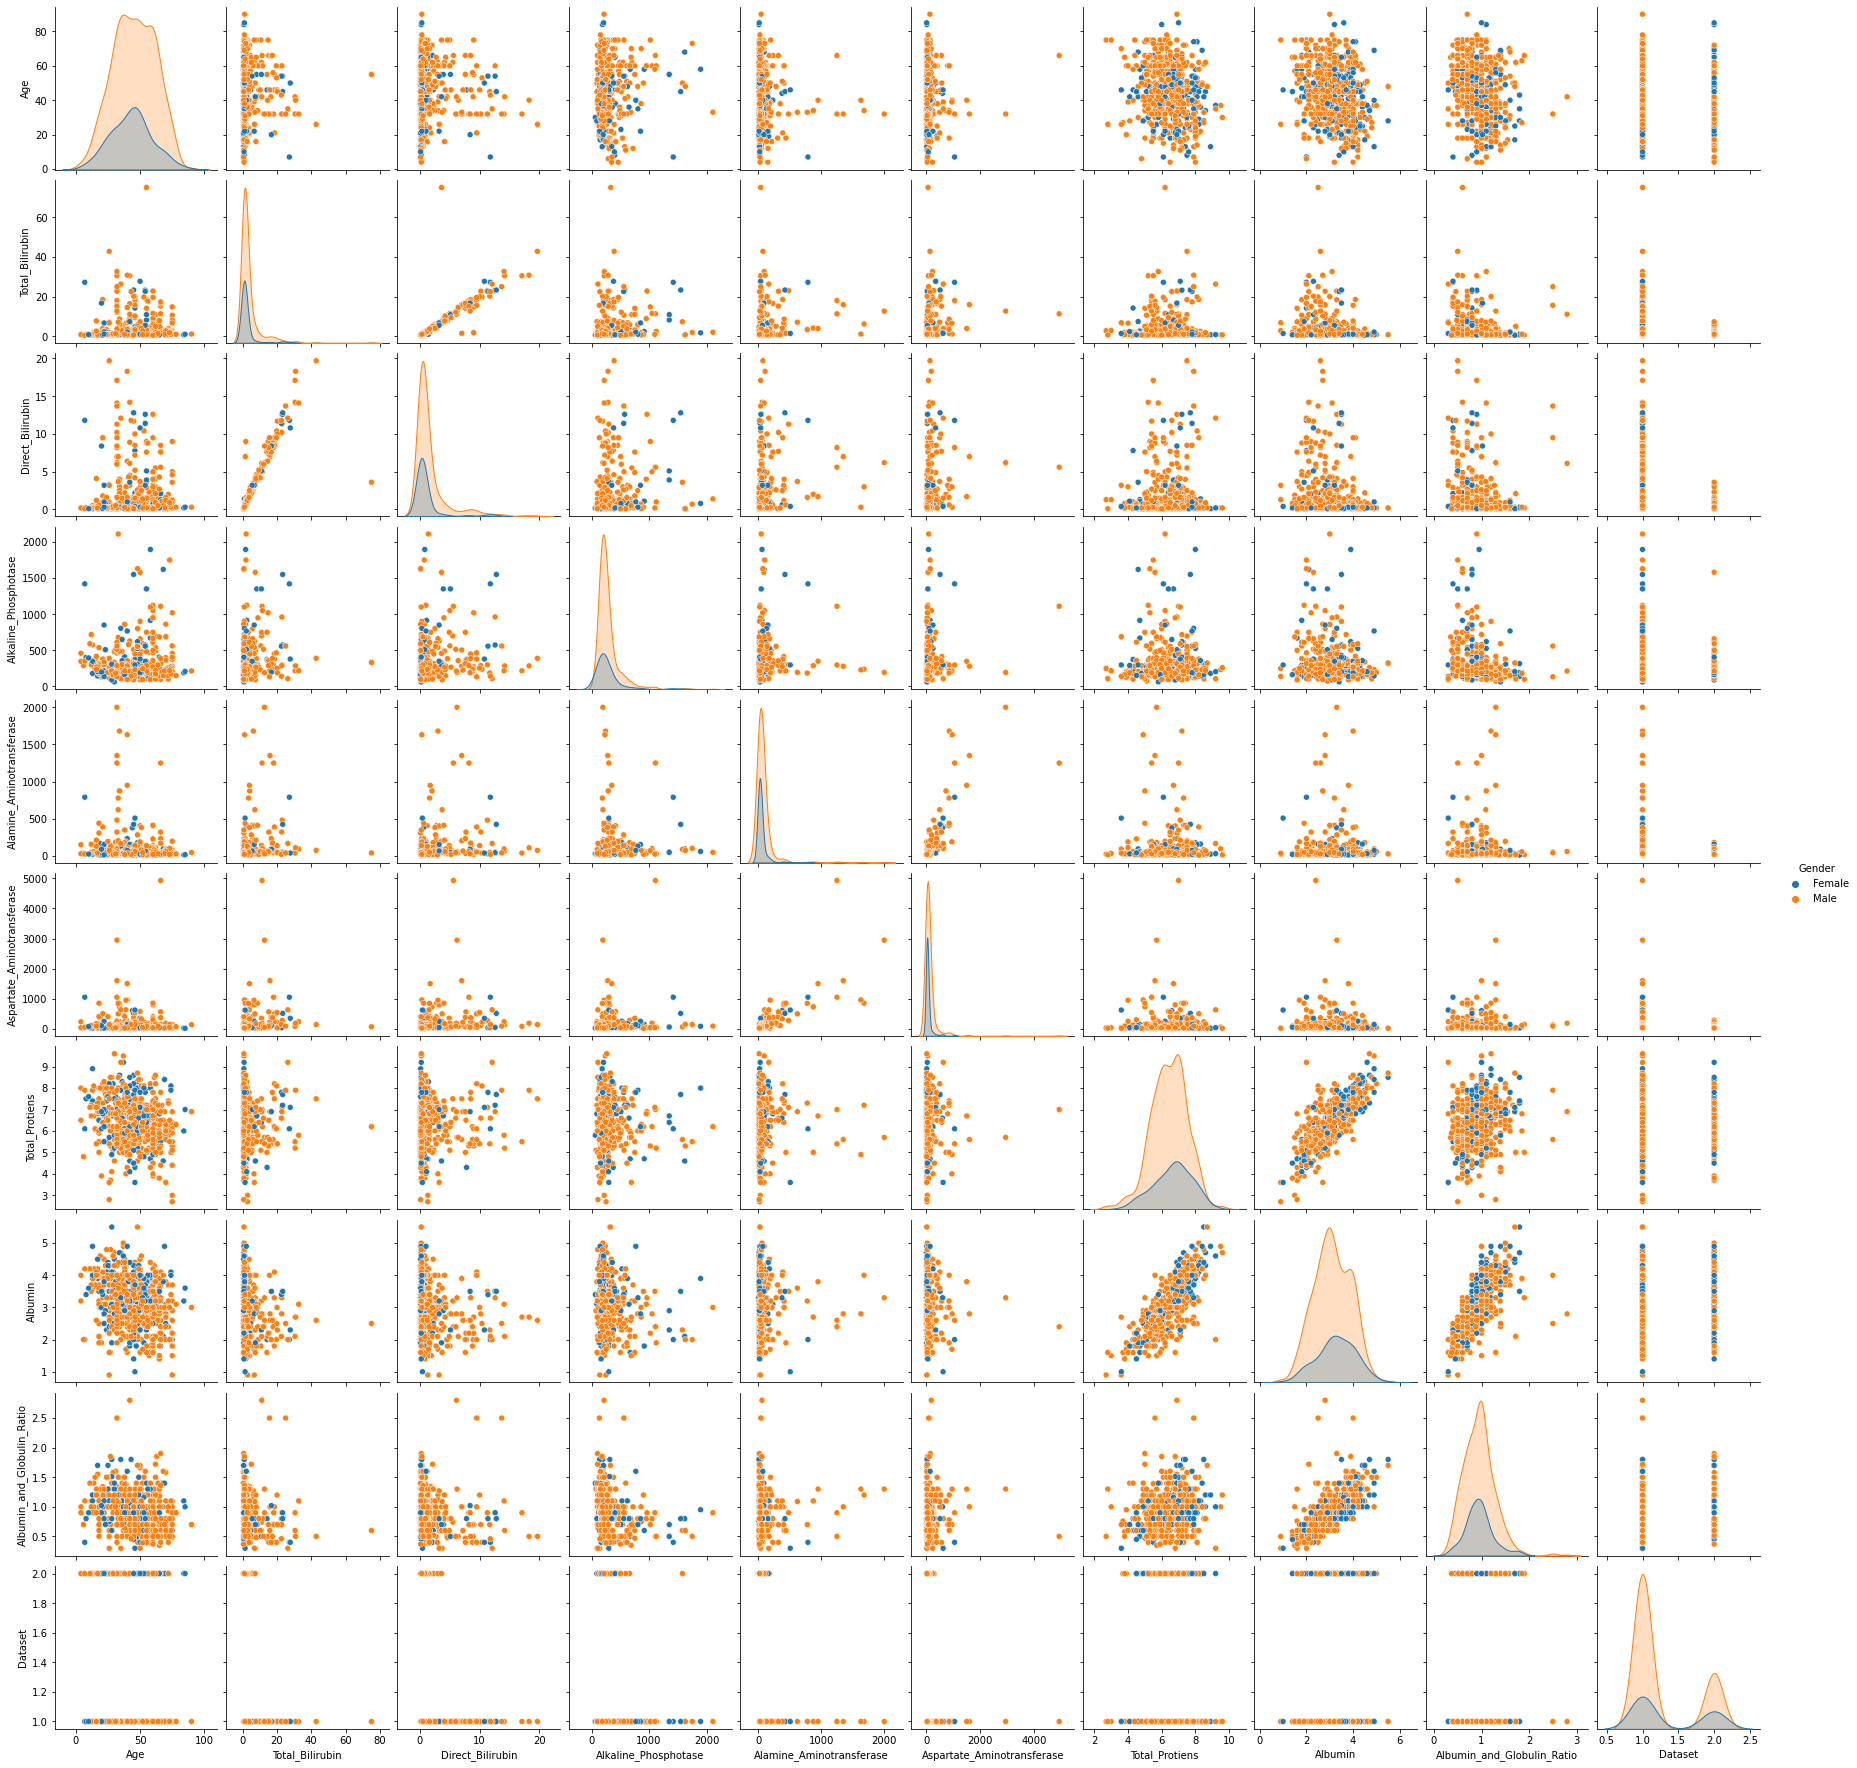

In [14]:
# pairplot by gender
sns.pairplot(df, hue='Gender')

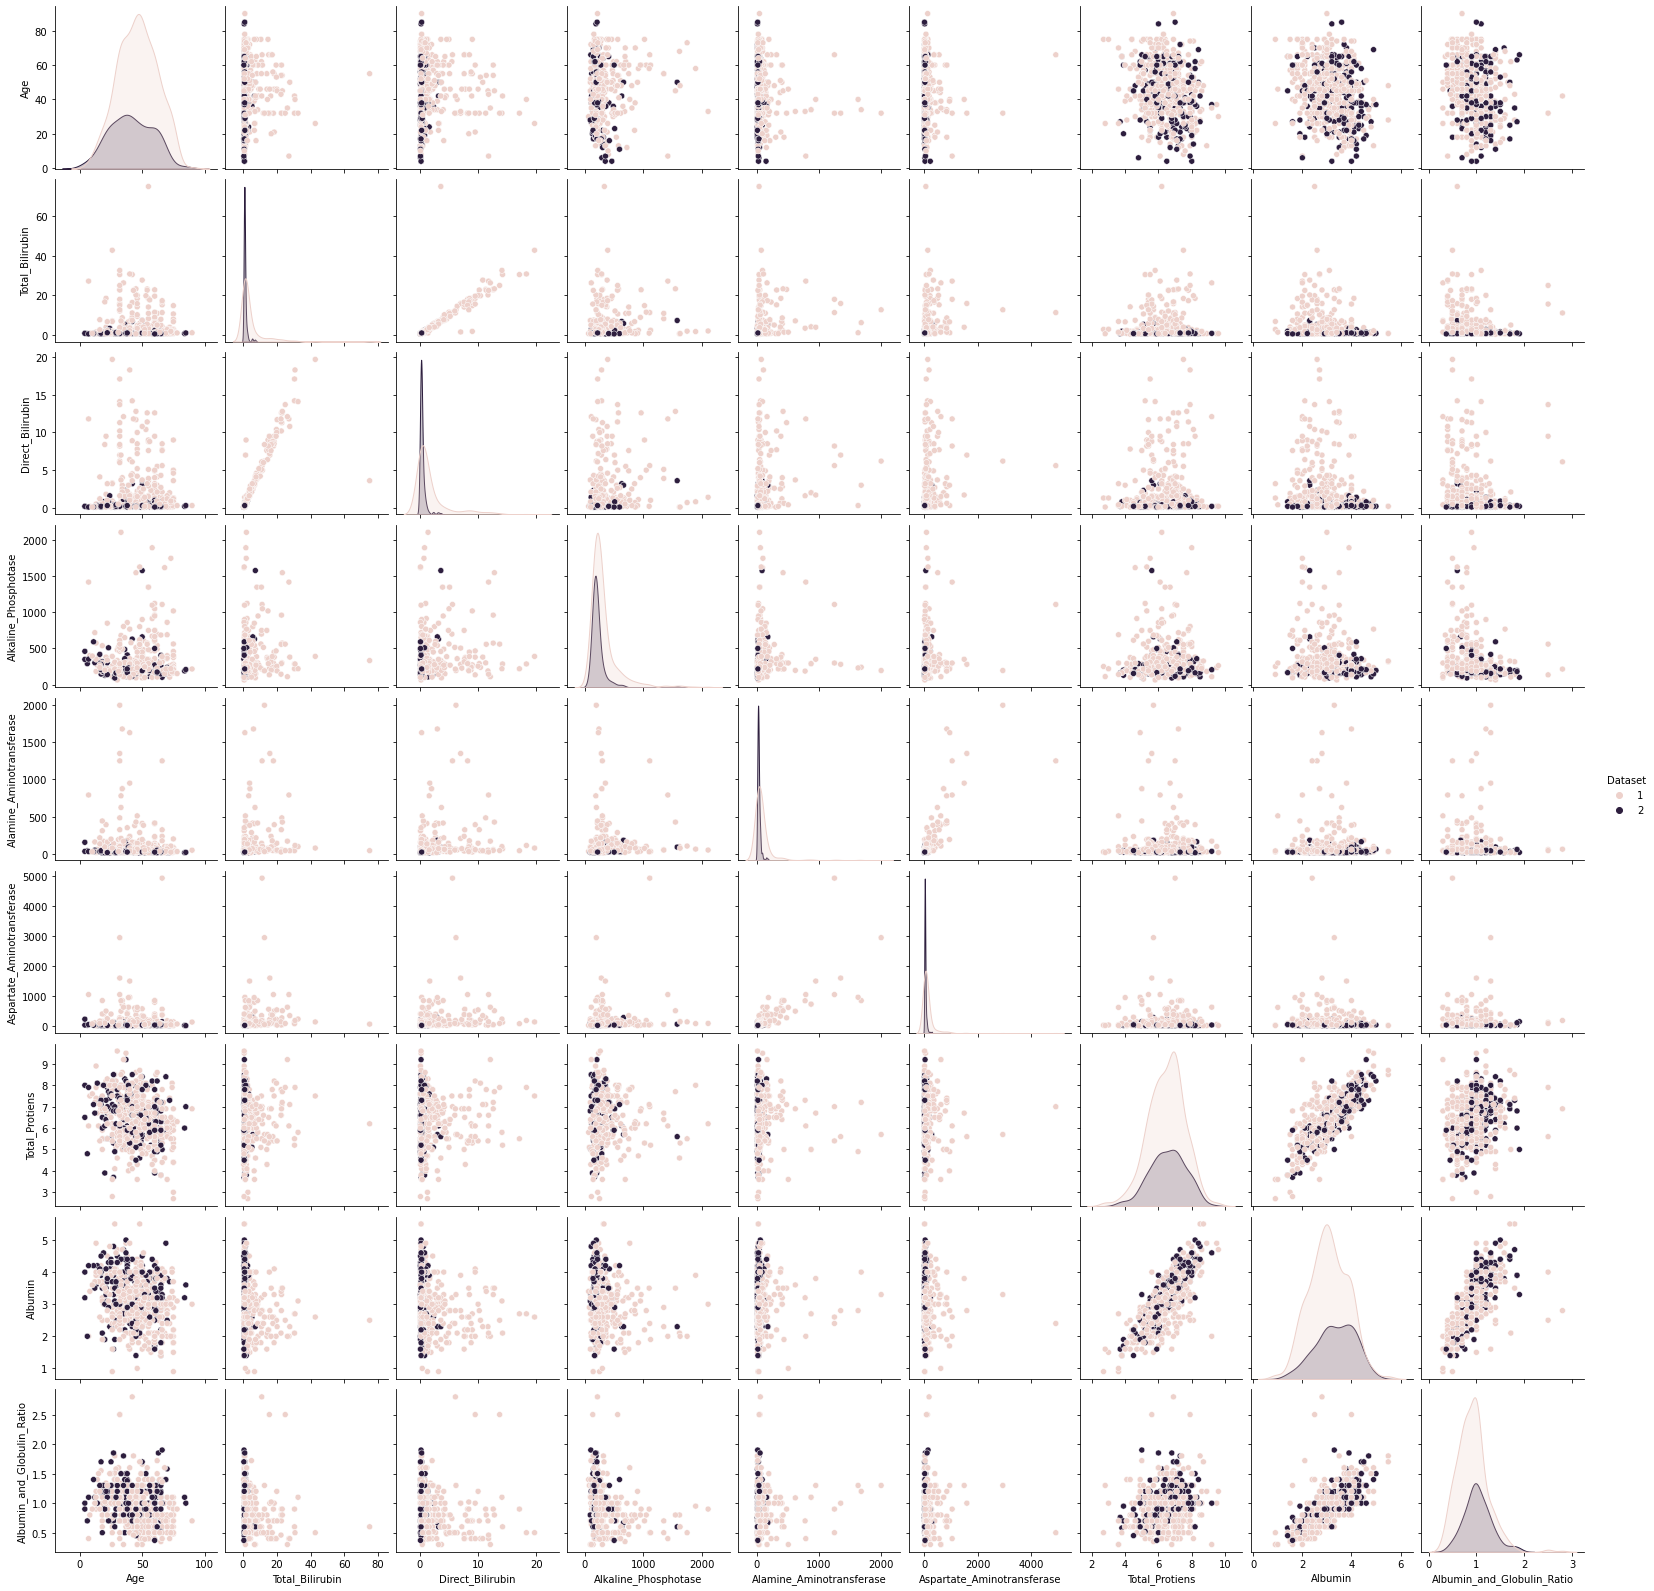

In [15]:
#PAIRPLOT BY TARGET
sns.pairplot(df, hue='Dataset')

In [16]:
df.corr()['Dataset']

Age                          -0.137351
Total_Bilirubin              -0.220208
Direct_Bilirubin             -0.246046
Alkaline_Phosphotase         -0.184866
Alamine_Aminotransferase     -0.163416
Aspartate_Aminotransferase   -0.151934
Total_Protiens                0.035008
Albumin                       0.161388
Albumin_and_Globulin_Ratio    0.163131
Dataset                       1.000000
Name: Dataset, dtype: float64

<AxesSubplot:>

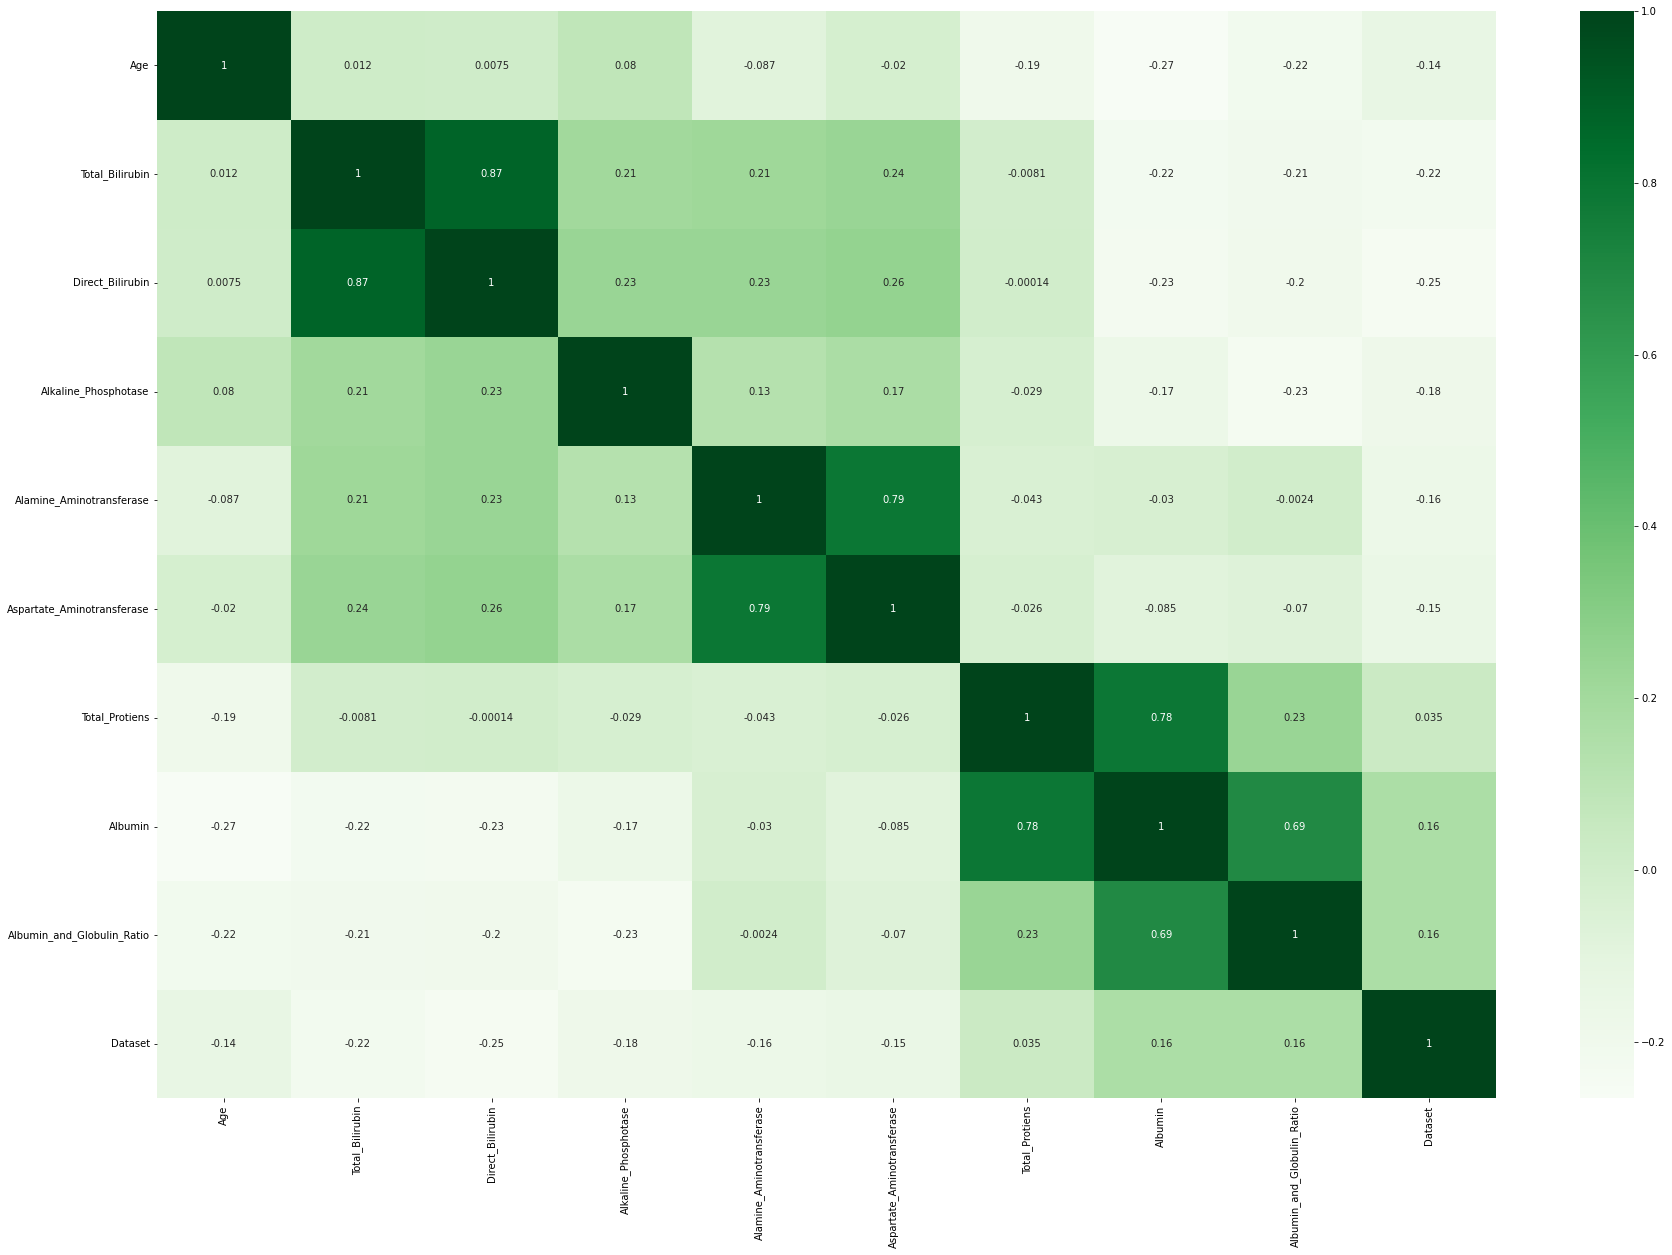

In [17]:
# check correlation
corr = df.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(corr, cmap='Greens', annot=True)

The following correlation are observed:
- Total_Protiens & Albumin
- Alamine_Aminotransferase & Aspartate_Aminotransferase
- Direct_Bilirubin & Total_Bilirubin
- There is some correlation between Albumin_and_Globulin_Ratio and Albumin. But its not as high as Total_Protiens & Albumin

During training we will only 1 feature out of each pair with high correlation, to see whether it helps preventing overfitting

In [18]:
df.drop(['Direct_Bilirubin', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin'], 
        axis=1, inplace=True)

## Analyzing Outliers

In [19]:
def Outliers(df, feature):
    trace0 = go.Box(y = df[feature],
                   name='All Points',
                    boxpoints='all',
                    jitter=0.3,
                    marker = dict(color = 'rgb(7,40,89)'),
                    line = dict(color = 'rgb(7,40,89)'))
    
    trace1 = go.Box(y=df[feature],
                   name='Only Whiskers',
                    boxpoints = False,
                    jitter=0.3,
                    marker = dict(color = 'rgb(9,56,125)'),
                    line = dict(color = 'rgb(9,56,125)'))
    
    trace2 = go.Box(y=df[feature],
                   name='Suspected Outliers',
                    boxpoints = 'suspectedoutliers',
                    jitter=0.3,
                    marker = dict(
                        color = 'rgb(8,81,156)',
                        outliercolor = 'rgba(219, 64, 82, 0.6)',
                        line = dict(
                            outliercolor = 'rgba(219, 64, 82, 0.6)',
                            outlierwidth = 2)),
                    line = dict(color = 'rgb(8,81,156)'))
    
    trace3 = go.Box(y = df[feature],
                    name = "Whiskers and Outliers",
                    boxpoints = 'outliers',
                    marker = dict(color = 'rgb(107,174,214)'),
                    line = dict(color = 'rgb(107,174,214)'))

    data = [trace0, trace1, trace2, trace3]

    layout = go.Layout(
        title = "{} Outliers".format(feature)
    )

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig, filename = "Outliers")

In [20]:
Outliers(df, 'Age')

In [21]:
Outliers(df, 'Total_Bilirubin')

In [22]:
Outliers(df, 'Alkaline_Phosphotase')

In [23]:
Outliers(df, 'Alamine_Aminotransferase')

In [24]:
Outliers(df, 'Albumin_and_Globulin_Ratio')

D:\conda\envs\analytic\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\conda\envs\analytic\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\conda\envs\analytic\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\conda\envs\analytic\lib\site-packages\se

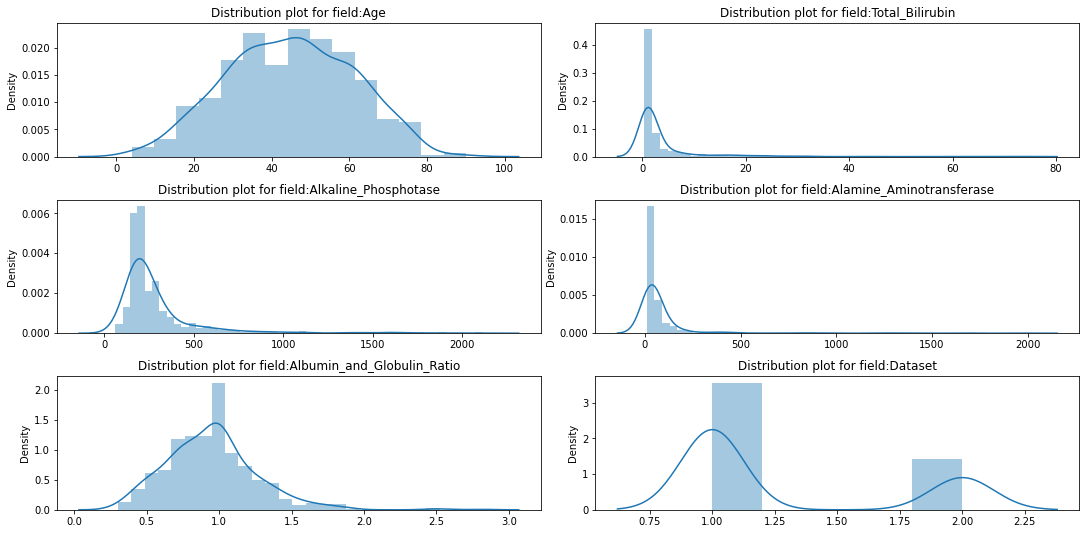

In [25]:
plt.figure(figsize=(15, 12))

for i, c in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(5,2,i+1)
    sns.distplot(df[c])
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

- dataset is slightly imbalanced
- slightly skewed features: albumin_and_globulin_ration
- strongly skewed features: total_bilirubin, direct_bilirubin, alkaline_phosphotase, alamine_aminotransferase, aspartate_aminotransferase

In [26]:
# save skewed features
skewed_cols = ['Albumin_and_Globulin_Ratio','Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase']

In [27]:
# Apply log1p transformation on dataframe - just selected values
for c in skewed_cols:
    df[c] = df[c].apply('log1p')

D:\conda\envs\analytic\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\conda\envs\analytic\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\conda\envs\analytic\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

D:\conda\envs\analytic\lib\site-packages\se

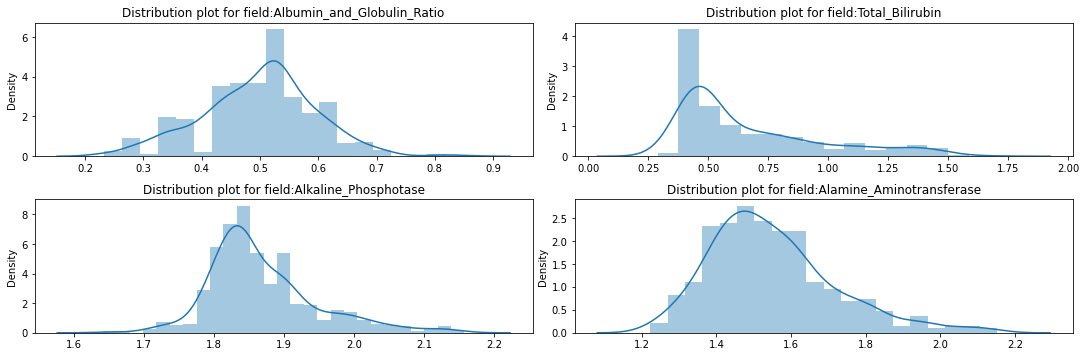

In [28]:
# check & fix strongly skewed features
# apply log1p transform
plt.figure(figsize=(15, 12))

for i, c in enumerate(skewed_cols):
    plt.subplot(5,2,i+1)
    sns.distplot(df[c].apply(np.log1p))
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

### Encode and scale numerical variables

In [31]:
# encode gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender'].head()

0    0
1    1
2    1
3    1
4    1
Name: Gender, dtype: int32

In [34]:
# scale with robustscaler
rs = RobustScaler()

for c in df[['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase', 
             'Alamine_Aminotransferase', 'Albumin_and_Globulin_Ratio']].columns:
    df[c] = rs.fit_transform(df[c].values.reshape(-1, 1))
df.head()

Age  Gender  Total_Bilirubin  Alkaline_Phosphotase  \
0  0.80    -1.0        -0.234465             -0.200886   
1  0.68     0.0         2.572890              2.293084   
2  0.68     0.0         2.053111              1.620312   
3  0.52     0.0         0.000000             -0.252023   
4  1.08     0.0         1.292782             -0.121830   

   Alamine_Aminotransferase  Albumin_and_Globulin_Ratio  Dataset  
0                 -0.797391                   -0.074138        1  
1                  0.627949                   -0.490442        1  
2                  0.560449                   -0.099112        1  
3                 -0.930409                    0.168602        1  
4                 -0.267086                   -1.519328        1

### Re-balancing the data

In [37]:
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [40]:
minority = df[df['Dataset'] == 2]
majority = df[df['Dataset'] == 1]

minority_upsample = resample(minority, replace=True, n_samples=majority.shape[0])

print('Majority sample size:', majority.shape)
print('Minority upsampled size:', minority_upsample.shape)


Majority sample size: (416, 7)
Minority upsampled size: (416, 7)


In [41]:
# merge majority with upsampled minority
df = pd.concat([minority_upsample, majority], axis=0)

In [42]:
# export the clean df
df.to_csv('cleaned_liver_df.csv', index=False)

In [43]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')